# TP1 OMNI - EURINSA - Calcul Symbolique avec Pyhton
# Fichier Jupyter pour élèves

L'objectif de ce TP est de présenter les possibiités de Pyhton en tant que "calulatrice" (littérale en particulier) dont la maîtrise permet à l'étudiant qui s'en empare de vérifier ses propres calculs en toute autonomie.

 

## 0. Prise en main du module ***SymPy***

### 0.1 Importation du module *SymPy* 
Comme tous les modules, `SymPy` doit être *importé* avant dêtre utilisé:




In [1]:
from sympy import *

`SimPy` permet d'effectuer  du calcul symbolique (ou littéral):
- manipulation d'expressions (substituion, simplification,...)
- dérivation
- intégration
- résolution d'équations algébriques
- résolution d'équations différentielles

... et bien d'autres choses encore!

### 0.2 Définition des symboles
Mais avant toute chose il est nécessaires de ***déclarer*** les noms des **symboles** que l'on va utiliser, en utilsant la commande `symbols()`:

In [2]:
x, y = symbols('x y')

### 0.3 Écriture d'une équation
Il est souvent nécessaire de déinir une équation. On utilise pour ce faire la fonction `Eq(mbre. de gauche, mbre. de droite)`

In [3]:
Eq(x, y)

Eq(x, y)

### 0.4 Quelques fonctions importantes de calclul littéral
Une fois les symboles définis, on peut construire n'importe quelle expressions littérale où interviennent ces symboles (cette expression  peut bien-entendu être stockée dans une variable)

In [4]:
x = symbols('x')
polynome = 3*x**2 +2*x - 9
polynome

3*x**2 + 2*x - 9

... et enchainer les opérations symboliques ...

On peut par exemple **dériver**

In [6]:
diff(polynome,x)

6*x + 2

ou bien **intégrer**

In [7]:
integrate(polynome,x)

x**3 + x**2 - 9*x

ou bien encore **résoudre**

In [8]:
solve(Eq(polynome,0))

[-1/3 + 2*sqrt(7)/3, -2*sqrt(7)/3 - 1/3]

Il est souvent **utile, voire nécessaire**, de préciser **cetaines hypothèses concernant les symboles**: *nature réelle* plutôt que complexe, *positivité*... Cela conditionne les résulats de certaines fonctions symboliques comme la réolution d'équations ou bien le calcul d'intégrales définies.
Comparer par exemple la résolution précédente à la suivante.

In [9]:
x = symbols('x', positive=True)
polynome = 3*x**2 +2*x - 9
solve(Eq(polynome,0))

[-1/3 + 2*sqrt(7)/3]

### 0.5 Applications Numériques
À partir de n'impotre quelle expression littérale, on peut passer à son application numérique avec  la méthode `evalf(susbs={var1: valeur, ...}`.
Dans les faits:
- soit `expr` une expression litérale faisant intervenir les symboles x et y
- soit à l'évaluer avec les données `x=1` et `y=2`
- on écrit `expr.evalf(subs={'x' : 1, 'y' : 2 })`

In [10]:
x = symbols('x')
polynome = 3*x**2 +2*x - 9
polynome.evalf(subs={x : 1})

-4.00000000000000

## 1. Application à la résolution d'un exercice de physique (système d'équations linéaires)
### (ex. 37 p.26 du poly de TD physique Eurinsa 2024-25)
Pour résoudre les courants $i$ et $j$ dans le cas de la question 1 (où $X$ est une résistance) avec les lois de Kirchhoff, il faut écrire 2 lois des mailles indépendantes.

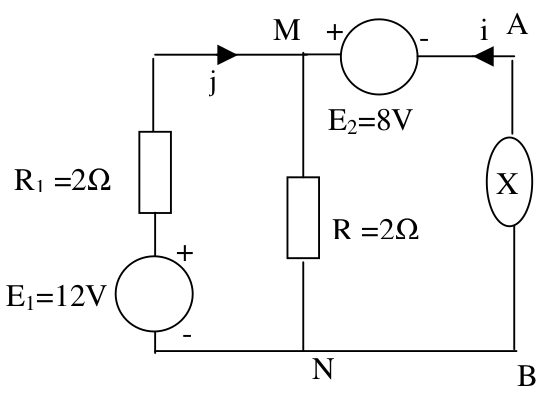

1. écrire la loi de la maille de gauche et la stocker dans la variable $M1$
1. écrire la loi de la maille "externe" et la stocker dans la variable $M2$
1. résoudre le système en utilisant la fonction SymPy `linsolve`

In [30]:
E1, E2 = symbols('E1 E2')
R, R1, X = symbols('R R1 X')
i, j = symbols('i j')

M1 = E1 - R1*j - R*(i+j)
M2 = X*i + E1 - R1*j - E2

# Solve using linsolve for i and j
solution = linsolve([M1, M2], [i, j])
solution

{((-E1*R + E2*R + E2*R1)/(R*R1 + R*X + R1*X), (E1*R + E1*X - E2*R)/(R*R1 + R*X + R1*X))}

## 2. Application au Calcul différentiel
### (ex. 3.18 p. 71 du poly d'OMNI 2024-25)
Lors de la charge d'un condensateur de capacité $C$ connecté à une f.e.m. idéale $E$ à travers une résistance $R$, en notant $u$ la tension à ses bornes à l'instant $t$, on a la relation:
$$C=\frac{t}{R \ln (E/u)}$$
1. Retrouver l'exression de la différentielle $\mathrm d C$ vue en TD
2. Exprimer l'incertitude sur $C$ en fonction des incertitudes sur $R$, $u$, $E$ et $t$
3. Application numérique: $u = (36, 8 \pm 0, 7) \mathrm V$, $R = (0, 99 \pm 0,04) \mathrm {M\Omega}$, $E = (100 \pm 2) \mathrm V$, $t = (10 \pm 0,1) \mathrm s$

In [68]:
C, t, R, E, u = symbols("C t R E u")
Dt = Symbol(r"\Delta t")
DR = Symbol(r"\Delta R")
Du = Symbol(r"\Delta u")
DE = Symbol(r"\Delta E")

C = t/(R*ln(E/u))

DC = abs(diff(C, t))*Dt + abs(diff(C, R))*DR + abs(diff(C, u))*Du + abs(diff(C, E))*DE
DC

\Delta E*Abs(t/(E*R*log(E/u)**2)) + \Delta R*Abs(t/(R**2*log(E/u))) + \Delta t/Abs(R*log(E/u)) + \Delta u*Abs(t/(R*u*log(E/u)**2))

In [71]:
# application numérique
DC.evalf(subs={u : 36.8, Du : 0.7, R : 0.99e6, DR : 0.04e6, E : 100, DE : 2, t : 10, Dt : 0.1})

9.03716005362058e-7

## 3. Application aux ED du premier ordre
Pour résoudre une ED à l'aide de Sympy, il faut désigner à l'aide de la fonction `Fonction()` quel symbole représente la fonction inconnue de l'ED.

Par exemple:
`y = Function('y')`

Il faut ensuite utiliser lafonction `dsolve`. Voici un exemple:

### résoudre l’équation différentielle  $y' + y = 0$, avec condition initiale y(0)=2





In [45]:
y = Function('y')
result = dsolve(Eq(y(x).diff(x)+y(x),0), y(x), ics={y(0):2})
result

Eq(y(x), 2*exp(-x))

### Reprendre quelques questions de l'ex. 4.2 p. 89 du poly d'OMNI 2024-25


In [58]:
# Exo 4.2
# 1)
result = dsolve(Eq(y(x).diff(x), 0), y(x), ics={y(2):5})
result

Eq(y(x), 5)

In [59]:
# 3)
result = dsolve(Eq(y(x).diff(x) + y(x), 0), y(x), ics={y(4):0})
result

Eq(y(x), 0)

In [60]:
# 5)
result = dsolve(Eq(3*y(x).diff(x) + y(x), sin(x)), y(x), ics={y(0):1})
result


Eq(y(x), sin(x)/10 - 3*cos(x)/10 + 13*exp(-x/3)/10)

## 4. Tracé de courbes en Python

Nous allons construire un premier script permettant de tracer la courbe d'une fonction à une variable. Nous allons utiliser les librairies `numpy` et `matplotlib`.

`numpy` est un module permettant de construire des tableaux, accéder à de nombreuses fonctions mathématiques, de travailler sur des problèmes d'algèbre  linéaire, ...

`pyplot` de `matplotlib` est un module permettant de réaliser des représentations graphiques. 

On crée un script qui permet de taper plusieurs instructions à exécuter à la suite dans une cellule de ce notebook.

Lorsque l'on souhaite  tracer en  Python  une fonction  $f$ sur un intervalle donné $I= [a,b]$, l'idée consiste à :\
1.Introduire un échantillonnage $ a = x_1 < x_2 < \ldots < x_N = b $ de l'intervalle $[a,b]$ d'un grand nombre de points,\
2. Déterminer la valeur des images de ces points par la fonction $f$ :  $f(x_i)$ pour  $i=1,2,...,N$,\
3. Tracer le nuage de points reliés $\{(x_i,f(x_i))\}_{i=1:N}$.

### Exercice 1 (Tracé d'une ligne brisée)

Taper dans votre script les instructions suivantes (leur action est en commentaire).

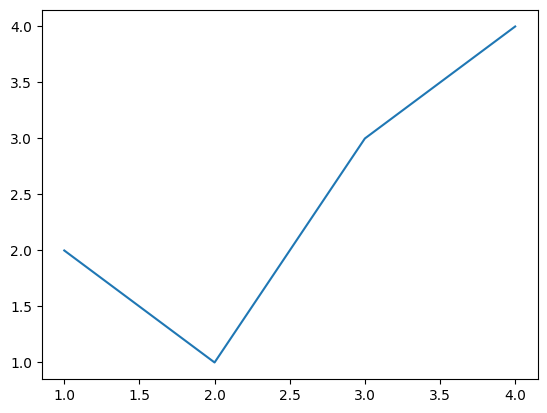

In [72]:
import numpy as np   # permet d'importer la librairie \textit{numpy} abrégée en np
import matplotlib.pyplot as plt # permet d'importer la librairie \textit{matplotlib} de \textit{pyplot} abrégée en plt
x = [1, 2, 3, 4]      # définit la liste des abscisses
y = [2, 1, 3, 4]      # définit la liste des ordonnées
plt.plot(x,y)  # représente une ligne brisée à partir des abscisses x et des ordonnées y.
plt.show()

### Exercice 2 (Tracé de la courbe d’une fonction)

Les fonctions de `numpy` opèrent directement sur des tableaux (et pas des listes !), donc  à partir d'un tableau $x$, on peut créer le tableau $y$ dont les entrées `y[i]`sont les `x[i]**2` simplement via : ``y=x**2``.

Continuer dans le même script, en remplaçant $N$ par 2, puis 5, puis par un nombre de points qui vous semble correct :

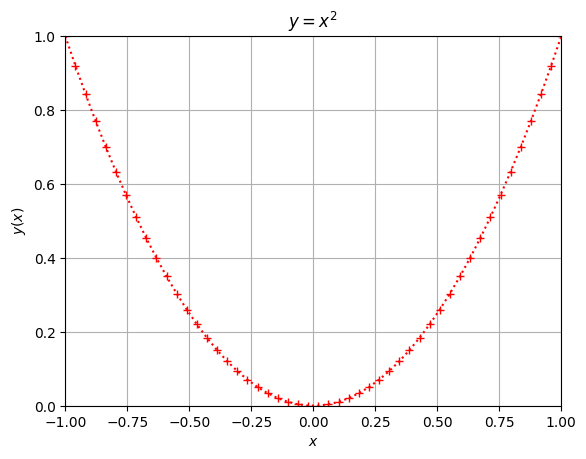

In [93]:
plt.clf()  # efface tous les tracés de la fenêtre graphique (plusieurs tracés successifs se superposent)
N=50
x=np.linspace(-1,1,N)  #   crée un grand tableau $x$ de N points régulièrement espacés
y=x**2   # crée le tableau image de $x$ par la fonction carrée
plt.grid()  # affiche une grille
plt.axis([-1, 1, 0, 1])
plt.xlabel("$x$")
plt.ylabel("$y(x)$")
plt.title("$y=x^2$")
plt.plot(x, y, color='r', marker="+", linestyle=":") #   représente la fonction carré à partir des abscisses x et des ordonnées y.

La fonction plot admet de nombreuses options de présentation:

- Le paramètre `color` permet de choisir la couleur ('g' : vert, 'r' : rouge, 'b' : bleu).
- Pour définir le style de la ligne, on utilise `linestyle`
 - '-' : ligne continue,
 - '- -' : ligne discontinue, 
 - ':' : ligne pointillée
- Si on veut marquer les points des listes, on utilise le paramètre `marker`, avec les différents symboles :
  - '+', 
  - '.', 
  - 'o', 
  - 'v' 
  
  ####  Essayer les différentes commandes et observer leurs effets


|     Quelques commandes utiles                                            |                                                                     |
|-------------------------------------------------|---------------------------------------------------------------------|
| `np.linspace(a,b,n)`                            | subdivise le segment $[ a, b ]$ en $n$ points régulièrement espacés |
| `plt.axis([x_min,x_max,y_min,y_max])` | spécifie la fenêtre graphique                                       |
| `plt.axis('equal')`                             | donne la même échelle sur chaque axe                                |
| `plt.grid()`                                    | affiche une grille                                                  |
| `plt.clf()`                                     | efface tous les tracés de la fenêtre graphique                      |
| `plt.close('all')`                              | ferme toutes les fenêtres graphiques précédentes                    |
| `plt.xlabel("texte")`                           | donne un libellé à l'axe $Ox$                                       |
| `plt.ylabel("texte")`                           | donne un libellé à l'axe $Oy$                                       |
| `plt.title("texte")`                            | donne un libellé à l'axe $Ox$                                       |
| `np.pi`                                         | le nombre pi                                                        |
| `np.sin, np.cos, np.exp...`                     | les fonctions usuelles qui agissent sur des tableaux de valeurs     |

### Exercice 3

1.Tracer la courbe représentative de la fonction définie par $f(t)=A\cos(\omega t + \phi)$ pour des paramètres de votre choix, avec le titre Oscillateur harmonique, et les libellés "temps" et "tension" sur chaque axe.
On pourra utiliser les commandes listées ci-dessus ou en fin de document.

Pour définir une fonction, on peut utiliser la syntaxe Python (attention l'indentation est obligatoire) :

```
def f(t):
    return expression_de_la_fonction_en_t

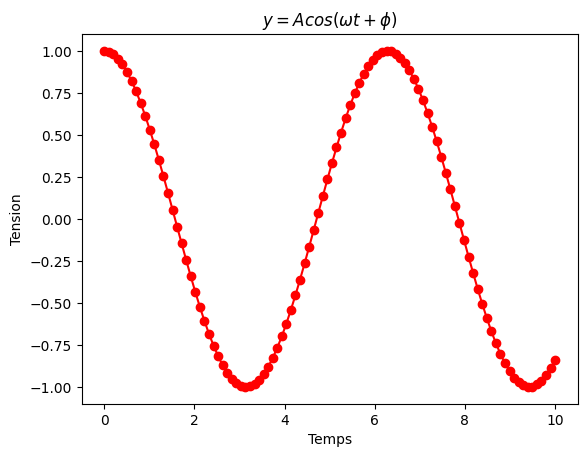

In [ ]:
def f(t, f):
    A, w = 1, 1
    return A*np.cos(w*t+f)

plt.clf()  # efface tous les tracés de la fenêtre graphique (plusieurs tracés successifs se superposent)
N = 100
x = np.linspace(0, 10, N)  #   crée un grand tableau $x$ de N points régulièrement espacés
y = f(x, 0)  # crée le tableau image de $x$ par la fonction carrée

plt.xlabel("Temps")
plt.ylabel("Tension")
plt.title(r"$y=Acos(\omega t + \phi)$")
plt.plot(x, y, color='r', marker="o", linestyle="-")

2.Tracer ensuite sur le même graphe plusieurs fonctions $f$ en faisant varier uniquement $\phi$. 

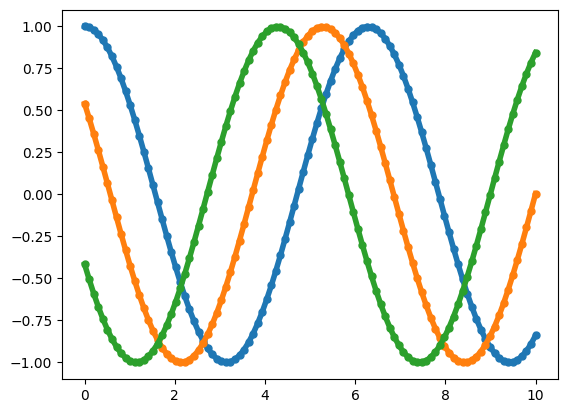

In [127]:
for i in range(3):
    y = f(x, i)  # crée le tableau image de $x$ par la fonction carrée
    plt.plot(x, y, marker="o", markersize=5, linestyle="-", lw=4) 
    

### Exercice 4

Vous pouvez maintenant tracer les solutions des équations différentielles résolues précédemment avec Sympy. 

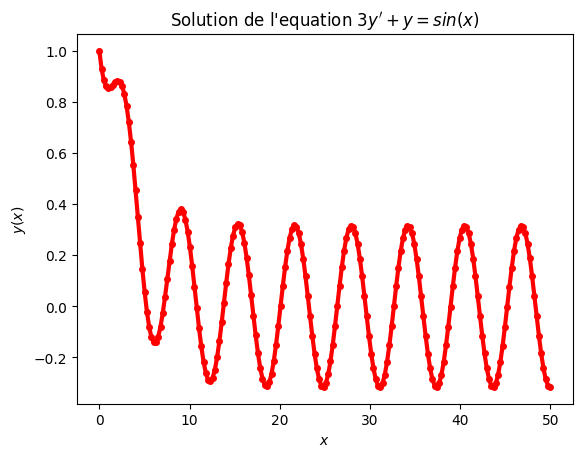

In [143]:
Y = Function('y')
# 5)
result = dsolve(Eq(3*Y(t).diff(t) + Y(t), sin(t)), Y(t), ics={Y(0):1})
result
y_sol = result.rhs
y_func = lambdify(t, y_sol, modules='numpy')

plt.clf()  # efface tous les tracés de la fenêtre graphique (plusieurs tracés successifs se superposent)
N = 200
x = np.linspace(0,50,N)  #   crée un grand tableau $x$ de N points régulièrement espacés
y = y_func(x)   # crée le tableau image de $x$ par la fonction carrée
plt.xlabel("$x$")
plt.ylabel("$y(x)$")
plt.title("Solution de l'equation $3y'+y=sin(x)$")
plt.plot(x, y, color='r', marker="o", markersize=4, linestyle="-", lw=3) 

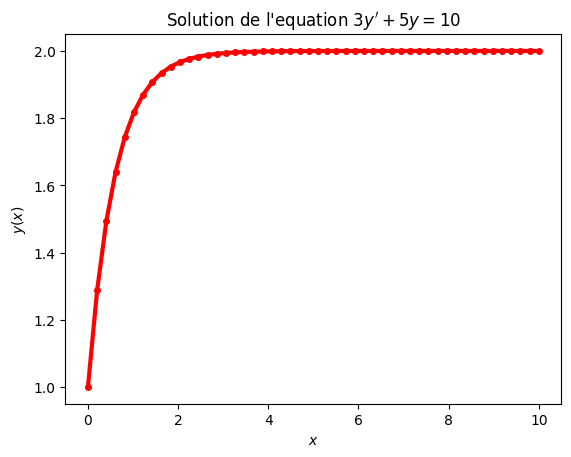

In [149]:
Y = Function('y')
# 5)
result = dsolve(Eq(3*Y(t).diff(t) + 5*Y(t), 10), Y(t), ics={Y(0):1})
result
y_sol = result.rhs
y_func = lambdify(t, y_sol, modules='numpy')

plt.clf()  # efface tous les tracés de la fenêtre graphique (plusieurs tracés successifs se superposent)
N = 50
x = np.linspace(0,10,N)  #   crée un grand tableau $x$ de N points régulièrement espacés
y = y_func(x)   # crée le tableau image de $x$ par la fonction carrée
plt.xlabel("$x$")
plt.ylabel("$y(x)$")
plt.title("Solution de l'equation $3y'+ 5y=10$")
plt.plot(x, y, color='r', marker="o", markersize=4, linestyle="-", lw=3) 

# Quelques informations utiles sur les librairies et fonctions utilisées dans Python

## Librairies ``numpy`` et ``pyplot``

``numpy`` est un module permettant de construire des tableaux, accéder à de nombreuses fonctions mathématiques, de
travailler sur des problèmes d’algèbre linéaire, ...
``pyplot`` de ``matplotlib`` est un module permettant de réaliser des représentations graphiques.

Quelques autres commandes utiles pour le tracé de courbes :

``
np.linspace(a,b,n)# subdivise le segment $[ a, b ]$ en $n$ points régulièrement espacés  
plt.axis([$x_{min},x_{max},y_{min},y_{max}$])# spécifie la fenêtre graphique 
plt.axis('equal')# donne la même échelle sur chaque axe 
plt.grid()# affiche une grille 
plt.clf()# efface tous les tracés de la fenêtre graphique 
plt.close('all')# ferme toutes les fenêtres graphiques précédentes 
plt.xlabel("texte")# donne un libellé à l'axe $Ox$ 
plt.ylabel("texte")# donne un libellé à l'axe $Oy$ 
plt.title("texte")# donne un titre au graphique
np.pi# le nombre pi 
np.sin, np.cos, np.exp...# les fonctions usuelles qui agissent sur des tableaux de valeurs 
``

La fonction ``plot(x,y)`` permet de représenter une ligne brisée à partir des abscisses ``x`` et des ordonnées ``y``. Elle admet de nombreuses options de présentation :

    - Le paramètre `` color`` permet de choisir la couleur ('g' : vert, 'r' : rouge, 'b' : bleu).
    - Pour définir le style de la ligne, on utilise ``linestyle`` ('-' : ligne continue,'- -' : ligne discontinue, ':' : ligne pointillée).
    - Si on veut marquer les points des listes, on utilise le paramètre ``marker`` ('+', '.', 'o', 'v' donnent différents symboles).
    
 
 
On peut ainsi, par exemple, utiliser les instructions suivantes pour modifier le rendu des courbes :
``
plt.plot(x,y,"--g")
plt.plot(x,y,"*r")
plt.plot(x,y,"-c",linewidth=5)
``